In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm
import time
from IPython import display

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

from grid import GridWorld

# Grid-World RL

We're first going to get acquainted with the two flavors of RL we learn in class (Q-learning and Policy Gradient). To keep things simple, we'll use a Grid World environment; the same one you saw in the lectures.

First, let's create an gridworld environment object

In [2]:
env = GridWorld()

Let's see what this environment looks like beyond the code. We can use the `render` method to see it.

Our grid world has 4 columns (x-axis) and 3 rows (y-axis). The blue circle is the agent and it starts at $(x, y) = (0, 1)$. The "objective" state is the one with the coin, $(x, y) = (3, 0)$ and the death state is at $(x, y) = (3, 1)$. The reward of going to any state is $-0.05$, except the objective ($r=1$) and death states ($r=-1$).

Also, there is a wall (or filled space) at $(x, y) = (1, 1)$. so you can not go to it.

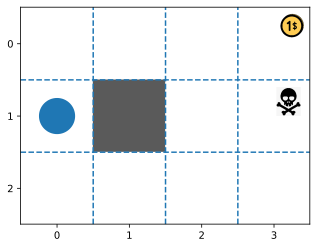

In [3]:
env.render();

We will have to map our action to numbers to work with them. There are 4 actions in this environment: Right ($a=0$), Down ($a=1$), Left ($a=2$), Up ($a=3$). If we go in a direction that is blocked (hitting a wall), we don't move.

Try running the script below, which goes through a movement sequence and visulizes it. We can give actions to the environment through the `step` method.

Everytime you want to start from the begining, you have to use the `reset` method to start over.

Note: The methods that we are using here conform to the standard Atari Gym API (from the DQN paper). This API has become best practice for working with RL environments.

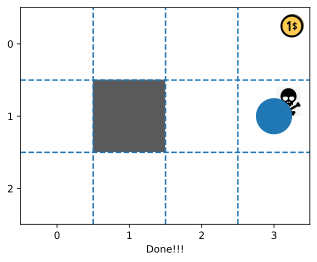

In [9]:
# Reset environment, get the initial state
# The state in grid world is two dimenional: [x, y], where x shows the column and y the row, counting from the top left
state = env.reset()

# Map action indices to text
direction = {0: 'right', 1: 'down', 2: 'left', 3: 'up'}
plt.figure()

# Go through a sequence of actions
for t, action in enumerate([3, 0, 0, 1, 1, 2, 2, 0, 0, 0, 3]):
    
    # Take a step by choosing an action. You get 4 outputs from this:
    #      next_state: The next state that taking the action leads to.
    #      rew: The reward we got from taking the action
    #      done: Is the episode over? In this environment an episode is over when we reach the objective or death states
    #      info: Other info of interest
    next_state, rew, done, info = env.step(action)
    
    # Render the environment
    env.render(plt.gca())
    plt.xlabel(f'Step {t}: went {direction[action]}, is in state (x, y) = ({next_state[0]}, {next_state[1]}), got a reward {rew}')
    
    # Some Jupyter notebook nonsense to show plots in a loop
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1.0)

time.sleep(3)
plt.xlabel('Done!!!')
display.clear_output(wait=True)

# Tabular Q-Learning

In this first assignment, we are going to understand and implement Q-learning in our simple grid world. Remember that Q-learning works by applying a greedy update over the current Q-values:

$$Q(s, a) = \mathbb{E}_{(r, s')~\sim~\epsilon(\cdot|s, a)} \left[ r + \gamma \cdot \max_{a' \in \mathcal{A}}  Q(s', a') \right]$$

If this at all does not seem reasonable or familiar, you are urged to go through the lecture slides and get a clear understanding of this formula. You will need this understanding as you are going to implement it below.


The training process for Q-learning is as follows:
1. Take an action according to an eps-greedy policy; meaning that with a probability $\epsilon$, take a random policy and otherwise choose the action that has the highest Q-value in that state.
2. Use the greedy update rule to update your Q-value table
3. Over time, anneal $\epsilon$. Start with fully random choices ($\epsilon=1$) at the start of training and decay it overtime to some low value, like 0.1.

## Assignment 1
Complete the two code snippets below and get a working Q-Learning training process. The policy (visualized by arrows) should be optimal by the end.

In [ ]:
# Some hyperparameters used in the training process
# DO NOT CHANGE
NUM_EPOCHS = 10                    #  How many iterations (or epochs) will we train
INITIAL_RANDOM_EPOCHS = 5          #  For the eps-greedy exploration process, how many initial epochs will we be completely random.
                                   #  People usually do this to bootstrap their training from an initial random policy
REPORT_EPOCHS = 2                  #  Visualize the policy after this many epochs
MIN_EPS = 0.1                      #  Anneal epsilon from epsilon greedy to this value. Basically, this means that by the end we will alway take 10% of actions randomly
GAMMA = 0.9                        #  This is the gamma you have seen many times with rewards and returns

# Initialize a Q-value table. You can try initializing it from a random starting point, and see for yourself that it works no matter what values you start with.
qtable = np.zeros((4, 3, 4))
# This is the schedule for epsilon. It seems very complicated but it is simply a linear function that is clipped to a range of 0.1 and 1
eps = lambda step: np.clip(NUM_EPOCHS/(NUM_EPOCHS-INITIAL_RANDOM_EPOCHS)*(1-step/NUM_EPOCHS), a_max=1, a_min=MIN_EPS)
# This is the learning rate we use. Remember that learning rate has some special conditions on it for Tabular Q-learning. 
# We advise you to look over the lecture slides amd figure out why this learning rate function is a good choice
lr = lambda step: 1/(step+1)

# A random number generator. We use this to make our experiments reproducible. This is very good practice in RL training.
rng = np.random.RandomState(seed=3)

env = GridWorld()

for epoch in trange(NUM_EPOCHS):
    # Each epoch is one full episode
    # An episode starts from the initial state (hence the reset function) and ends when we reach a terminal state, like the objective or death state.
    obs = env.reset()
    done = False
    
    # We continue an episode until it terminates
    while not done:
        
        ########################### START OF ASSIGNMENT 1 ###################################
        ############# Your code below #################
        # Write the following code to choose the action. Remember that the policy is epsilon-greedy.
        # Use rng for random numbers
        
        # act = ...
        
        ########################### END OF ASSIGNMENT 1 #####################################
        
        next_obs, rew, done, info = env.step(act)
        
        alpha = lr(epoch)
        ########################### START OF ASSIGNMENT 1 ###################################
        ############# Your code below #################
        # Write the following code to apply the greedy Q-learning update
        # Use alpha as the learning rate for this step
        
        # qtable = ...
        
        ########################### END OF ASSIGNMENT 1 #####################################
        
        obs = next_obs
    
    # Visualize the policy based on the Q-tables
    if epoch % REPORT_EPOCHS == 0:
        ax = env.visualize_qtable(qtable)
        ax.set_title(f'Epoch {epoch}')

# Visualize the final policy
ax = env.visualize_qtable(qtable)
ax.set_title(f'Final')

# Tabular Policy Gradient

In the second assignment, we are going to use policy gradient instead. Policy gradient worked by use some policy, characterized by $\theta$, to sample trajectories. The value of those trajectories look like this:

$$J(\theta)=\mathbb{E}_{\tau \sim p(\tau;\theta)} \left[ R(\tau) \right] = \sum_{\tau} p(\tau; \theta) R(\tau)$$

After defining this function, policy gradient improves the returns by moving the parameters $\theta$ in the direction of $\nabla_\theta J(\theta)$. This is called gradient ascent. The policy gradient is:

$$\nabla_\theta J(\theta)=\mathbb{E}_{\tau \sim p(\tau;\theta)} \left[ \nabla_\theta \log p(\tau; \theta))~R(\tau) \right]$$

### Formulating the policy

Now suppose we wanted to try this. How would we define a policy? We'll create one the same way we create a Q-value table. We'll create a policy table, where each state and action have a weight. These weights are basically our parameters, $\theta$. So in the grid world example, for each state there are 4 numbers for 4 directions. How do we define a policy using these numbers?

Say for state $s$ the numbers are $v_1(s), v_2(s), v_3(s), ..., v_M(s)$, where the number of actions are $M=|\mathcal{A}|$. We could say the possibility of action $i$ is proportional to $v_i(s)$:

$$p(a=i|s)=\pi(i|s)=\frac{v_i(s)}{\sum_{a=1}^M v_a(s)}$$

What is the issue with this? It restricts all $v_a(s)$ to be positive and non-zero. This is not favorable. If the policy gradient ascent causes one of them to become negative, a probability becomes negative and the whole setup fails. 

We'll make a small change that fixes this. We'll have the possibility of action $i$ be proportional to $e^{v_i(s)}$. This avoids the issues from before and looks like this:

$$p(a=i|s)=\pi(i|s)=\frac{e^{v_i(s)}}{\sum_{a=1}^M e^{v_a(s)}}$$

This is called a Softmax function and is very popular in Machine Learning. The best point about all of this is that the gradient is very simple. Basically, the partial derivative of $p(a=i|s)$ with respect to any $v$ is:

$$\frac{\partial p(a=i|s)}{\partial v_{\hat{a}}(\hat{s})} = 0,~~~~\text{If }\hat{s} \neq s$$
Since the policy in state s only depends on values that define the policy for state s. We also have:
$$\frac{\partial p(a=i|s)}{\partial v_{\hat{a}}(\hat{s})} = -p(a=\hat{a}|s),~~~~\text{If }\hat{s} = s ~ \text{and } \hat{a} \neq i$$
$$\frac{\partial p(a=i|s)}{\partial v_{\hat{a}}(\hat{s})} = 1-p(a=i|s),~~~~\text{If }\hat{s} = s ~ \text{and } \hat{a} = i$$
You are encouraged to try the derivation yourself, to gain some intuition.

Note: We are omitting a few things from the standard Softmax function for simplicity. You can research the general version yourself, but this explanation should suffice for this assignment.

In [ ]:
# The Softmax function
# This function takes a one-dimensional array x, and outputs the softmax probabilities.
def softmax(x):
    max_x = np.max(x, axis=-1, keepdims=True)
    e_x = np.exp(x - max_x)
    sum_x = np.sum(e_x, axis=-1, keepdims=True)
    return e_x / sum_x

# The gradient of the log of the Softmax function
# This function takes a one-dimensional array x, and outputs a gradient vector for the parameters (x).
def nabla_log_softmax(x, index):
    s = -softmax(x)
    s[index] += 1
    return s

### Putting it all together
Now that we have a policy, let's go over the the training process for policy gradient:
1. Take actions according to your policy table.
2. Once you have a full episode $\tau$, use the policy gradient by:
    1. Calculate the episode return $R(\tau)$.
    2. Calculate the gradient of the log probability $\nabla_\theta \log p(\tau; \theta))$, for the episode. You have to loop over all actions and calculate the gradient.

## Assignment 2
Complete the code snippet below and get a working policy-gradient training process. The policy is visualized by arrows in 4 directions, where the length of each arrow shows how likely it is.
The policy should be somewhat optimal by the end in the top row.

In [ ]:
# Some hyperparameters used in the training process
# DO NOT CHANGE
NUM_EPOCHS = 150                   #  How many iterations (or epochs) will we train
REPORT_EPOCHS = 50                 #  Visualize the policy after this many epochs
GAMMA = 0.9                        #  This is the gamma you have seen many times with rewards and returns


# Initialize a policy table. Unlike Q-Learning, it is imperative to start with a fully zero table, as that means the starting policy is random (Why?).
# Without this, we would not explore.
policy_table = np.zeros((4, 3, 4))
# This is the learning rate we use. Unlike Q-Learning, the learning rate here is fixed
lr = 1e-1

# A random number generator. We use this to make our experiments reproducible. This is very good practice in RL training.
rng = np.random.RandomState(seed=3)

env = GridWorld()

for epoch in trange(NUM_EPOCHS):
    # Each epoch is one full episode
    # An episode starts from the initial state (hence the reset function) and ends when we reach a terminal state, like the objective or death state.
    obs = env.reset()
    done = False
    
    # We have to store our interactions with the environment, so we can apply the policy gradient update afterwards. Why didn't we need this in Q-Learning?
    list_obs = []
    list_rew = []
    list_act = []
    
    # We continue an episode until it terminates
    while not done:
        # Choose the next action. "softmax(policy_table[obs[0], obs[1]])" gives a distribution over actions.
        # "rng.choice" can sample actions with that distribution
        act = rng.choice(4, p=softmax(policy_table[obs[0], obs[1]]))
        
        next_obs, rew, done, info = env.step(act)
        
        # Store interactions
        list_obs.append(obs)
        list_rew.append(rew)
        list_act.append(act)
        
        obs = next_obs
    
    ########################### START OF ASSIGNMENT 2 ###################################
    ############# Your code below #################
    # Write the following code to apply the policy-gradient update. We have already laid out the steps.
    # 1. You have to compute R(tau) and save it to rew_all
    # 2. You have to compute the gradients of log softmax policies
    # 3. You have to apply the gradient ascent based on these two

    # rew_all = ...

    nabla_policy_table = np.zeros((4, 3, 4))

    # for obs, act in zip(list_obs, list_act):
    #     nabla_policy_table += ...

    # policy_table += lr * ...

    ########################### END OF ASSIGNMENT 2 #####################################
    
    # Visualize the policy
    if epoch % REPORT_EPOCHS == 0:
        ax = env.visualize_policy_table(softmax(policy_table))
        ax.set_title(f'Epoch {epoch}')
        

# Visualize the final policy
ax = env.visualize_policy_table(softmax(policy_table))
ax.set_title(f'Final')

policy_table_1 = policy_table

### An improvement
Remember that we could simplify the policy gradient formula by scoring an action only based on the actions that come after it. Basically, a rederivation of the of the previous policy gradient looked like this:

$$\nabla_\theta J(\theta)= \mathbb{E} \left[ \sum_{t\ge 0} \nabla_\theta \log \pi_\theta(a_t|s_t) \cdot (\sum_{l\ge0}\gamma^l r_l) \right]$$

The rewards we assign to action $a_t$ in step $s_t$ include rewards $r_0, r_1, ... r_{t-1}$. However, $a_t$ had nothing to do with previous rewards and is only responsible for the returns after $t$. So we could make a small change in the formula:

$$\nabla_\theta J(\theta)= \mathbb{E} \left[ \sum_{t\ge 0} \nabla_\theta \log \pi_\theta(a_t|s_t) \cdot (\sum_{l\ge t}\gamma^l r_l) \right]$$

By employing this trick, we decrease the variance of the policy gradient method.

## Assignment 3
Complete the code snippet below and decrease the policy gradient variance. We generally expect the policy to converge faster.

In [ ]:
# Some hyperparameters used in the training process
# DO NOT CHANGE
NUM_EPOCHS = 150                   #  How many iterations (or epochs) will we train
REPORT_EPOCHS = 50                 #  Visualize the policy after this many epochs
GAMMA = 0.9                        #  This is the gamma you have seen many times with rewards and returns


# Initialize a policy table. Unlike Q-Learning, it is imperative to start with a fully zero table, as that means the starting policy is random (Why?).
# Without this, we would not explore.
policy_table = np.zeros((4, 3, 4))
# This is the learning rate we use. Unlike Q-Learning, the learning rate here is fixed
lr = 1e-1

# A random number generator. We use this to make our experiments reproducible. This is very good practice in RL training.
rng = np.random.RandomState(seed=3)

env = GridWorld()

for epoch in trange(NUM_EPOCHS):
    # Each epoch is one full episode
    # An episode starts from the initial state (hence the reset function) and ends when we reach a terminal state, like the objective or death state.
    obs = env.reset()
    done = False
    
    # We have to store our interactions with the environment, so we can apply the policy gradient update afterwards. Why didn't we need this in Q-Learning?
    list_obs = []
    list_rew = []
    list_act = []
    
    # We continue an episode until it terminates
    while not done:
        # Choose the next action. "softmax(policy_table[obs[0], obs[1]])" gives a distribution over actions.
        # "rng.choice" can sample actions with that distribution
        act = rng.choice(4, p=softmax(policy_table[obs[0], obs[1]]))
        
        next_obs, rew, done, info = env.step(act)
        
        # Store interactions
        list_obs.append(obs)
        list_rew.append(rew)
        list_act.append(act)
        
        obs = next_obs
    
    ########################### START OF ASSIGNMENT 3 ###################################
    ############# Your code below #################
    # Write the following code to apply the policy-gradient update. We have already laid out the steps.
    # 1. You have to compute the [sum of gamma^l r_l for l >= t] and save it to returns
    # 2. You have to compute the gradients of log softmax policies times the returns from step 1 (this is different from before, why?)
    # 3. You have to apply the gradient ascent based on step 2

    traj_length = len(rew_list)
    returns = np.zeros(traj_length)
    nabla_policy_table = np.zeros((4, 3, 4))
    
    # for i in range(traj_length):
    #     returns[i] = ...

    # for obs, act in zip(list_obs, list_act):
    #     nabla_policy_table += ...

    # policy_table += lr * ...

    ########################### END OF ASSIGNMENT 3 #####################################
    
    # Visualize the policy
    if epoch % REPORT_EPOCHS == 0:
        ax = env.visualize_policy_table(softmax(policy_table))
        ax.set_title(f'Epoch {epoch}')
        

# Visualize the final policy
ax = env.visualize_policy_table(softmax(policy_table))
ax.set_title(f'Final')

policy_table_1 = policy_table

Let's compare the result of Assignment 2 and Assignment 3. The policy at the end of Assignment 3 should have converged faster than 2.

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
env.visualize_policy_table(softmax(policy_table_1), axes[0])
axes[0].set_title(f'Final policy in Assignment 2')
env.visualize_policy_table(softmax(policy_table_2), axes[1])
axes[1].set_title(f'Final policy in Assignment 3')

## Assignment 4
You might have noticed, in Assignment 2 and 3, that the policies for the bottom row don't look so great. Why is this? Does it mean we are getting bad returns?


Your answer here:

# Adaptive Bit Rate (ABR) and Pensieve


For the last part of this lab, we'll recreate [Pensieve](https://web.mit.edu/pensieve/)!!!

The code snippet below runs a training process for the ABR environment (slightly simplified to converge in 750 epochs). We use Pytorch to handle neural networks and automatic gradient calculation.

It is beneficial, but not obligatory, to go through this code and understand what is happening. If you are interested, you could also look at `core_pg.py` to see how the policy gradient variant in this setup works. 

Just briefly introducing this environment:

* The point is to download video chunks in a streaming session, while optimizing for high quality video and low rebuffering.
* The state in the ABR environment is:
    * the current buffer occupancy
    * previous action
    * chunks left in the video
    * some history of throughput and download times
    * chunk sizes for the next video chunk
* The actions in this environment are a set of video encodings, each different in size and quality. Naturally, a higher size means a higher quality.
* The reward is some QoE (Quality of Experience) metric. This metric is a linear combination of quality and rebuffering penalty.

In [3]:
from core_pg import sample_action, train_actor_critic
from core_log import log_a2c
from abr_env.abr import ABRSimEnv
from nn import PensNet
from utils import ewma
from buffer import TransitionBuffer
from torch.utils.tensorboard import SummaryWriter
from normer import Normer
import torch
import os


def train_pensieve(gamma, ent_max, ent_decay, name):
    # Create some folders to save models and tensorboard data
    os.makedirs(f'models/{name}/', exist_ok=True)
    os.makedirs('tensorboard/', exist_ok=True)

    # Monitor training with tensorboard
    monitor = SummaryWriter(f'tensorboard/{name}', flush_secs=10)
    
    # An object to normalize the observation vectors, This usually speeds up training.
    normer = Normer()

    # A set of hyperparameters
    # DO NOT CHANGE
    LR = 1e-2                       #  Learning rate
    WD = 1e-4                       #  Weight decay (or in other words, L2 regularization penalty)
    NUM_EPOCHS = 750                #  How many epochs to train
    EPOCH_SAVE = 100                #  How many epochs till we save the model
    ENT_MAX = ent_max               #  Initial value for entropy
    ENT_DECAY = ent_decay           #  Entropy decay rate
    REW_SCALE = 25                  #  Reward scale
    LAMBDA = 0.95                   #  Lambda, used for GAE-style advantage calculation
    GAMMA = gamma                   #  Gamma in discounted rewards
    
    # We will save episodic returns for comparison later
    returns = np.zeros(NUM_EPOCHS)

    # Making runs deterministic by using specific random seeds
    torch.random.manual_seed(123)
    np.random.seed(123)
    
    # The ABR environment, the argument is the random seed
    env = ABRSimEnv(15)
    
    # This is the width of the observation
    obs_len = env.observation_space.shape[0]
    # This is the number of possible actions
    act_len = env.action_space.n

    # Entropy factor, this is the entity pushing for exploration
    entropy_factor = ENT_MAX

    # The actor network, which we call policy_net here
    policy_net = torch.jit.script(PensNet(obs_len, act_len, [32, 16]))
    # The critic network, which we call value_net here
    value_net = torch.jit.script(PensNet(obs_len, 1, [32, 16]))
    # A buffer that takes care of storing interaction data. This replaces the 3 lists we used for the tabular policy gradient assignment
    buff = TransitionBuffer(obs_len, env.total_num_chunks)

    # Optimizers that apply gradients, SGD could be used instead but this optimizer performs better
    net_opt_p = torch.optim.Adam(policy_net.parameters(), lr=LR, weight_decay=WD)
    net_opt_v = torch.optim.Adam(value_net.parameters(), lr=LR, weight_decay=WD)
    
    # The loss for training the critic, which is basically a Mean Squared Error loss
    net_loss = torch.nn.MSELoss(reduction='mean')

    # Check elapsed time
    last_time = time.time()

    # Training process
    for epoch in trange(NUM_EPOCHS):

        # Same as before, each epoch is one episode
        obs = env.reset()
        buff.reset_head()
        done = False

        while not done:
            # We sample an action
            act = sample_action(policy_net, normer(obs), torch.device('cpu'))

            # We take a step
            next_obs, rew, done, info = env.step(act)

            # Save our interactions in the buffer
            buff.add_exp(obs, act, rew, next_obs, done, info['stall_time'])

            obs = next_obs

        # The buffer size is set to the length of episodes (the video length), so this line is a sanity check
        assert buff.buffer_full()

        # Get all the saved interactions from the buffer manager
        all_states, all_next_states, all_actions_np, all_rewards, all_dones = buff.get()

        # Train A2C with GAE and entropy regularizer, the names sound scary but they are simpler than you think
        pg_loss, v_loss, real_entropy, ret_np, v_np, adv_np = train_actor_critic(value_net, policy_net, net_opt_p, net_opt_v, net_loss, torch.device('cpu'), 
                                                                                 all_actions_np, normer(all_next_states), all_rewards / REW_SCALE, 
                                                                                 normer(all_states), all_dones, entropy_factor, GAMMA, LAMBDA)

        # Normalized entropy, it ranges from 1 (fully random policy) to 0 (One action is deterministically taken)
        norm_entropy = real_entropy / - np.log(act_len)
        
        # Decay the entropy factor
        entropy_factor = max(0, entropy_factor-ENT_DECAY)

        # Save the model
        if epoch % EPOCH_SAVE == 0:
            state_dicts = [policy_net.state_dict(), value_net.state_dict()]
            torch.save(state_dicts, f'models/{name}/model_{epoch}')

        # Update elapsed time
        curr_time = time.time()
        elapsed = curr_time - last_time
        last_time = curr_time

        # Log the training via tensorboard
        log_a2c(buff, ret_np, v_np, adv_np, pg_loss, v_loss, entropy_factor, norm_entropy, elapsed, monitor, epoch)
        
        # Save returns
        returns[epoch] = buff.reward_fifo.sum()

    # Save the final model
    state_dicts = [policy_net.state_dict(), value_net.state_dict()]
    torch.save(state_dicts, f'models/{name}/model_{epoch}')
    
    return returns

The code snippet below runs the training process with the following config:

```
returns = train_pensieve(gamma, initial_entropy, entropy_decay_rate, tensorboard_session_name)
```

* `gamma` refers to $\gamma$, which you have seen before in the discounted sum of rewards.
* `initial_entropy` refers to an exploration paramater, and more accurately, its value at the start of training.
* `entropy_decay_rate` refers to the rate that the exploration parameter decays. This will be explained more concretely later.
* `tensorboard_session_name` refers to the name that experiment logs will be saved with tensorboard. You will soon see how to use tensoboard.

`returns` refers to the sum of rewards at each epoch. This is the value we intend to maximize, or in other words, this is a sample of $J(\theta)$ when $\gamma=1$. Why is $\gamma$ set to one?
Because our main goal has been optimizing the sum of rewards, without discounting. Discounting rewards is a trick we use to simplify training procedures.

Run this code snippet (it takes 2 minutes on a MBP 2019), and observe the returns of an optimized and tuned pensieve training process. Notice how at first returns are small but after training they gradually increase.

In [ ]:
ret = train_pensieve(gamma=0.9, ent_max=1, ent_decay=1/400, name='pensieve')
plt.figure()
plt.plot(ewma(ret, 0.97), color='C0')          # This is called an Exponentially Weighted Moving Average. It sounds complicated but it essentially smooths out noisy curves
plt.plot(ret, alpha=0.2, color='C0')
plt.ylim(bottom=-1500, top=1500)
plt.xlabel('Epochs')
plt.ylabel('QoE Returns');

## Assignment 5
Try decreasing and increasing gamma ($\gamma$).
You can try the extreme ends, namely $\gamma=1, \gamma=0$. 

Plot the returns for these schemes, and compare them to the original setting of $\gamma=0.9$.

Can you explain the difference based on what $\gamma$ does?


Your answer here:

In [ ]:
########################### START OF ASSIGNMENT 5 ###################################
############# Your code below #################
# ret_low_gamma = ...
# ret_high_gamma = ...

# plt.plot(...)
########################### END OF ASSIGNMENT 5 #####################################

## Assignment 6
You observed an exploration scheme in Q-Learning, called epsilon-greedy. There is a similar thing in Actor Critic methods.

In the Advantage Actor Critic setup that you saw before, we use entropy regularization to explore. The entropy of a policy, $H(\pi)$ refers to how random it is. We want this entropy to be high at the start of training and gradually go down, so that by the end the policies are roughly deterministic.

Towards this end, the entropy of the policy is added in the policy gradient loss with some coefficient $\kappa$:
$$loss = J(\theta) + \kappa \cdot H(\pi_\theta)$$

This $\kappa$ determines how important increasing exploration is compared to optimizing returns. To motivate high exploration at the beginning and low exploration by the end, $\kappa$ is annealed from some high value to zero in the training process.

To see the effect of this entropy regularization scheme, try two variants:
* No entropy regularization at all
* No decaying the entropy

Plot the returns for these schemes, and compare them to the original setting.

Can you explain the difference based on what we described here?


Your answer here:

In [ ]:
########################### START OF ASSIGNMENT 6 ###################################
############# Your code below #################
# ret_no_entropy = ...
# ret_no_decay = ...

# plt.plot(...)
########################### END OF ASSIGNMENT 6 #####################################

### Tensorboard
Tensorboard is an automatic and live visualization tool for ML and RL training. We log many values in the course of training, such as policy gradient loss, critic training loss, average action index, average rewards, average buffer in ABR sessions, etc. You can view all these logs, from environmental ones to RL training metrics and analyze/debug the training process.

To use tensorboard, go to the `tensorboard` folder and in a terminal shell, run the following command:
```
tensorboard --logdir=. --port= 10234
```
Then in a web browser, go to this url and use tensorboard:
[localhost:10234](http://localhost:10234/)